# Project 5 -- Aman Patel

# Question 1

In [3]:
myDF <- read.csv("/anvil/projects/tdm/data/flights/subset/2006.csv")
options(repr.matrix.max.cols=100, repr.matrix.max.rows=100)

In [4]:
head(myDF)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,2006,1,11,3,743,745,1024,1018,US,343,N657AW,281,273,223,6,-2,ATL,PHX,1587,45,13,0,,0,0,0,0,0,0
2,2006,1,11,3,1053,1053,1313,1318,US,613,N834AW,260,265,214,-5,0,ATL,PHX,1587,27,19,0,,0,0,0,0,0,0
3,2006,1,11,3,1915,1915,2110,2133,US,617,N605AW,235,258,220,-23,0,ATL,PHX,1587,4,11,0,,0,0,0,0,0,0
4,2006,1,11,3,1753,1755,1925,1933,US,300,N312AW,152,158,126,-8,-2,AUS,PHX,872,16,10,0,,0,0,0,0,0,0
5,2006,1,11,3,824,832,1015,1015,US,765,N309AW,171,163,132,0,-8,AUS,PHX,872,27,12,0,,0,0,0,0,0,0
6,2006,1,11,3,627,630,834,832,US,295,N733UW,127,122,108,2,-3,BDL,CLT,644,6,13,0,,0,0,0,0,0,0


In [5]:
pa_flights <- myDF[myDF$Dest == "PHL", ]

In [6]:
length(unique(pa_flights$Origin))

[1] 66

When I was finding the length, I got a 6 digit number, but then I read up about the unique() function (link posted below) and learned that using the unique function prints the length without counting the repeated values.

Link URL: https://www.geeksforgeeks.org/r-language/unique-function-in-r

In [7]:
tail(sort(tapply(pa_flights$AirTime, pa_flights$Origin, mean, na.rm=TRUE)["BOS"]))

BOS 
63.91288

In [8]:
phx_flights <- myDF[myDF$Dest == "PHX", ]

In [9]:
sort(tapply(phx_flights$AirTime, phx_flights$Origin, mean, na.rm=TRUE))

TUS       FLG       YUM       LAS       SAN       PSP       ONT       SNA 
 26.96664  40.29872  40.42635  45.64101  50.19332  50.43451  51.73822  53.37789 
      ABQ       LGB       ELP       LAX       BUR       SBA       BFL       CLD 
 56.55171  56.94185  57.52113  57.76579  63.66425  68.90028  69.97759  73.94271 
      SLC       SBP       FAT       DRO       RNO       MRY       COS       AMA 
 74.67444  76.79610  79.72702  81.35437  83.30622  85.23380  86.40533  87.00000 
      SJC       SMF       DEN       GJT       SFO       OAK       TEX       BOI 
 87.21705  89.89822  90.08069  90.70594  91.37507  92.08200  94.61667 100.68349 
      ASE       MFR       BIL       SAT       OKC       AUS       EUG       ICT 
114.83274 115.84653 117.41176 123.29505 123.50225 125.90365 126.63286 127.04615 
      DFW       PDX       GEG       TUL       FCA       IAH       SEA       HOU 
127.23544 133.59757 134.31084 136.76079 136.88421 142.79034 144.87183 145.95824 
      OMA       MCI       FSD       DSM       LIT       MSP       MEM       MSY 
146.19101 149.67804 154.48889 163.03717 165.35989 174.64629 178.68329 179.82039 
      STL       ORD       MDW       BNA       MKE       BHM       IND       SDF 
180.04927 197.66761 199.67100 202.27304 205.68619 206.94199 209.63893 213.17260 
      ATL       CVG       CMH       DTW       JFK       CLE       CLT       TPA 
218.62524 219.86945 229.73432 230.20256 235.24275 238.37530 243.60935 247.30028 
      PIT       MCO       BUF       RDU       FLL       IAD       DCA       BWI 
248.17218 252.86593 261.91736 264.50212 269.46890 269.64635 271.85542 275.23001 
      MIA       PHL       BOS       EWR       ANC       BDL       PVD       OGG 
277.22749 281.35337 282.68664 291.77710 303.83799 304.96359 314.59697 317.87642 
      KOA       LIH       HNL 
319.18410 333.38559 378.04469

1.1 PHL has 66 flight origins in 2006

1.2 Flights leaving BOS had an average air time of 63.913

1.3 The average air time across each origin for flights ending in PHX is posted above, with HNL having the highest air time average

# Question 2

In [10]:
top_20 <- names(head(sort(table(myDF$Dest), decreasing=TRUE), n=20))

I used https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/names to research some information on the names() function

In [11]:
top_dests_df <- myDF[myDF$Dest %in% top_20, ]

%in% is used to check whether a value is found in another set of values

In [12]:
tapply(top_dests_df$AirTime, list(top_dests_df$Origin, top_dests_df$Dest), mean, na.rm=TRUE)

,ATL,BOS,CLT,CVG,DEN,DFW,DTW,EWR,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHL,PHX,SFO,SLC
ABE,99.76581,NA,76.24309,86.53635,NA,NA,75.50000,NA,NA,38.75000,NA,NA,38.50000,NA,NA,105.34195,NA,NA,NA,NA
ABI,NA,NA,NA,NA,NA,37.10790,NA,NA,NA,NA,NA,144.00000,NA,NA,NA,NA,NA,NA,NA,NA
ABQ,155.82889,NA,NA,150.65424,55.01665,76.08173,NA,219.24324,103.27048,NA,74.64480,99.82022,NA,184.00831,126.50704,140.79052,NA,56.55171,130.20445,77.40541
ABY,33.82929,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACK,NA,NA,NA,NA,NA,NA,NA,61.00976,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACT,NA,NA,NA,NA,NA,29.97392,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ACV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,61.25723,NA
ACY,111.41406,NA,NA,95.27191,NA,NA,NA,NA,NA,NA,NA,NA,37.75000,129.45000,NA,NA,NA,NA,NA,NA
AEX,74.48528,NA,NA,NA,NA,73.76596,NA,NA,37.27797,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AGS,38.84975,NA,34.62500,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We used sort() before using names() because names() returns the labels of the table (which is in alphabetical order), but sort() makes it so that names() will return the data in order of highest flight counts.

The na.rm=TRUE only removes the missing values from the air time average calculations, not the origin and destination pairs. 

# Question 3

In [13]:
ice_cream <- read.csv("/anvil/projects/tdm/data/icecream/combined/products.csv")
summary(ice_cream)

    brand               key                name             subhead         
 Length:241         Length:241         Length:241         Length:241        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 description            rating       rating_count    ingredients       
 Length:241         Min.   :1.200   Min.   :  2.00   Length:241        
 Class :character   1st Qu.:4.000   1st Qu.: 28.00   Class :character  
 Mode  :character   Median :4.400   Median : 59.00   Mode  :character  
                    Mean   :4.223   Mean   : 90.02                     
                    3rd Qu.:4.700   3rd Qu.:112.00                     
                    Max.   :5

In [14]:
rating_phrases <- table(cut(ice_cream$rating, breaks=c(0, 2, 3, 4, 5), labels=c("Wouldn't Recommend", "Needs Improvement", "Solid Choice", "Fan Favorite")))

In [15]:
head(rating_phrases)


Wouldn't Recommend  Needs Improvement       Solid Choice       Fan Favorite 
                 2                 14                 52                173 

Another way that the cut() function can be used is to use it on the rating_count column. This would allow us to see how widely reviewed something is. We could categorize it as "Low Popularity", "Medium Popularity", and "High Popularity"

# Question 4

In [16]:
my_flights <- read.csv("/anvil/projects/tdm/data/flights/subset/1997.csv")

In [17]:
table(cut(my_flights$DepTime, breaks=c(0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400)))


          (0,300]         (300,600]         (600,900]     (900,1.2e+03] 
            40119             45068           1046463            968561 
(1.2e+03,1.5e+03] (1.5e+03,1.8e+03] (1.8e+03,2.1e+03] (2.1e+03,2.4e+03] 
           998262            997450            893498            324659 

In [18]:
my_flights$depart_times <- cut(my_flights$DepTime, breaks=c(0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400), labels=c("Night", "Early Morning", "Morning", "Late Morning", "Afternoon", "Evening", "Late Evening", "Late Night"))

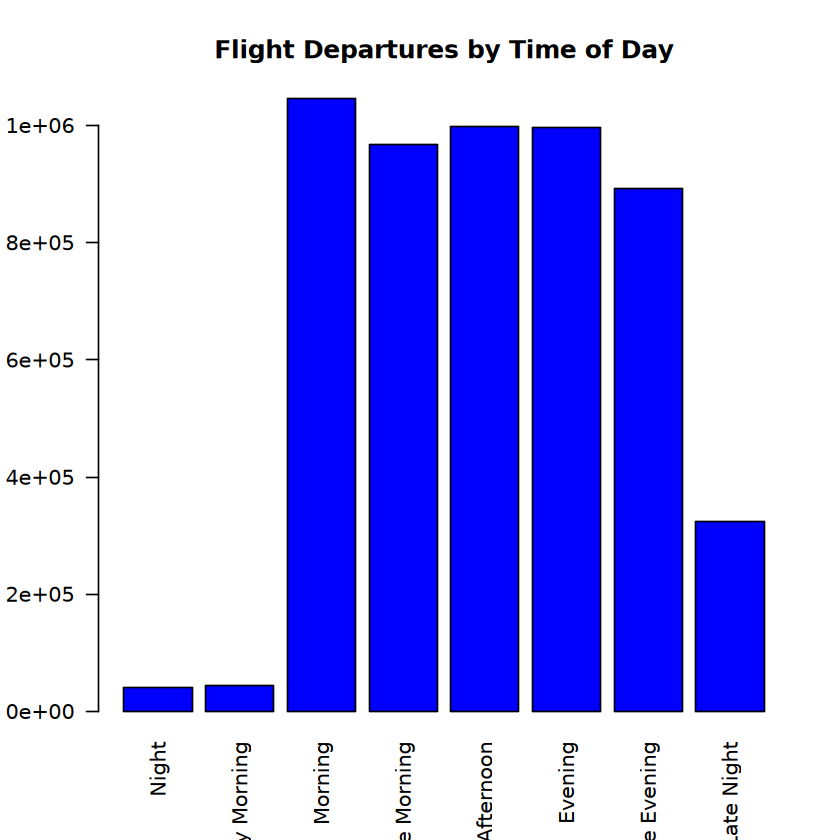

In [19]:
barplot(table(my_flights$depart_times), main="Flight Departures by Time of Day", col="blue", las=2)

In [20]:
my_flights$arrival_times <- cut(my_flights$ArrTime, breaks=c(0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400), labels=c("Night", "Early Morning", "Morning", "Late Morning", "Afternoon", "Evening", "Late Evening", "Late Night"))

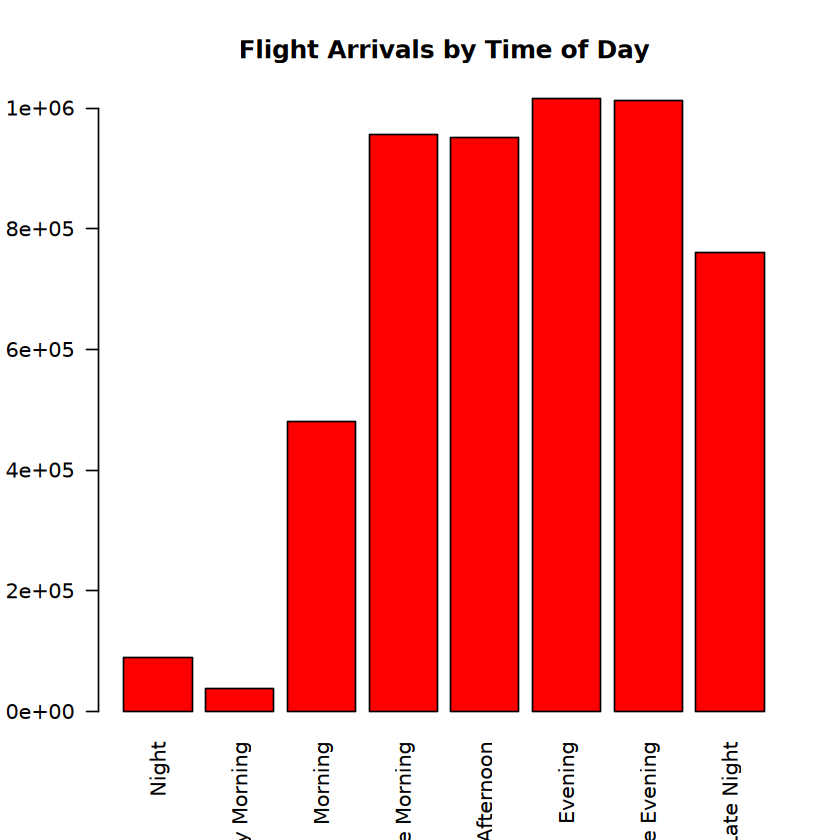

In [21]:
barplot(table(my_flights$arrival_times), main="Flight Arrivals by Time of Day", col="red", las=2)

4.1 - 900 was the time that had the most departure flights

4.2 - Early morning or 300 was the time that had the least arrival flights

4.3 - One conclusion I see is that the nights have much less acitivites going on, whereas, as expected, the afternoon/evenings have much more activities going on at the airports.

# Question 5

In [22]:
march <- subset(my_flights, Month == 3)

In [23]:
table(march$DayOfWeek)


    1     2     3     4     5     6     7 
76352 61070 61093 61100 61052 68031 72288 

In [24]:
table(my_flights$DayOfWeek)


     1      2      3      4      5      6      7 
790298 791617 802130 785731 786342 706198 749527 

In [25]:
flight_times <- tapply(my_flights$AirTime, list(my_flights$DayOfWeek, my_flights$Month), sum, na.rm=TRUE)

In [26]:
flight_times

,1,2,3,4,5,6,7,8,9,10,11,12
1,5820142,5996050,7450628,6032763,5943737,7525264,6100879,6104229,7425773,5954814,5990224,7521815
2,5894308,6014615,6036897,7438885,5973378,6023384,7587559,6088182,7471445,5977490,6012467,7485652
3,7265554,6062085,6047810,7510912,5976554,5988220,7577076,6109375,5945379,7473880,6059871,7239442
4,7310610,6065632,5998931,6021716,7487291,6029059,7567389,6120396,5943426,7506399,5682853,5824651
5,7415133,5992478,6028038,6061881,7528029,6046017,5840017,7627953,5915696,7477447,5761139,5989230
6,5463380,5457435,6930980,5540389,6793947,5688313,5628626,7087879,5374278,5319835,6785410,5518159
7,5643971,5719389,7284005,5808701,5645453,7321258,5920780,7247138,5694575,5697566,7231943,5819670


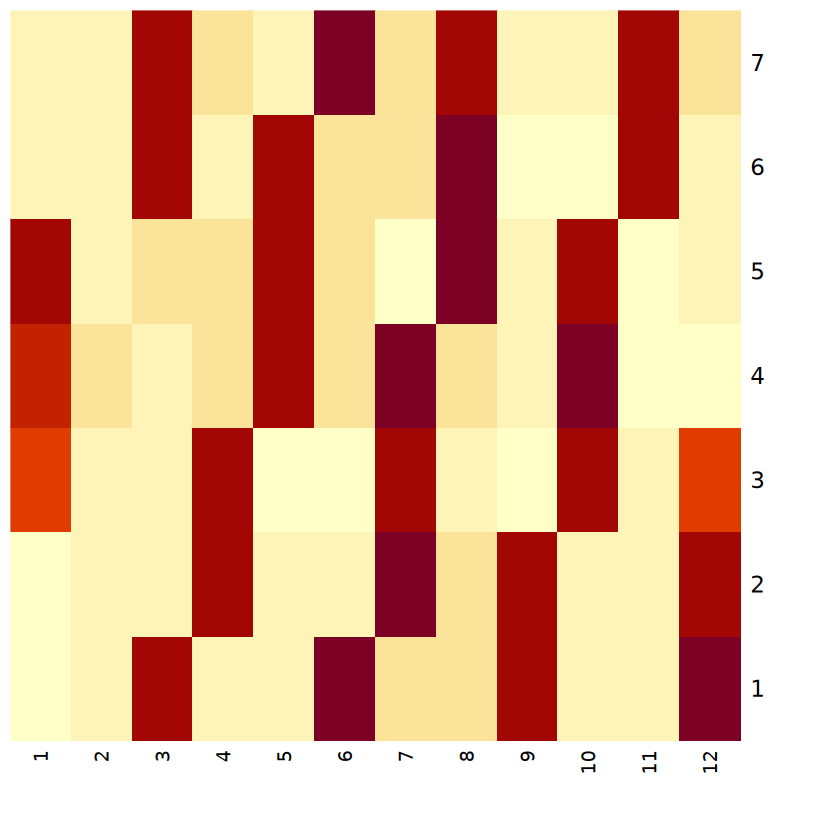

In [31]:
heatmap(flight_times, Rowv = NA, Colv=NA)

The heatmap above is for the day of the week category

In [28]:
flight_times_month <- tapply(my_flights$AirTime, list(my_flights$DayofMonth, my_flights$Month), sum, na.rm=TRUE)

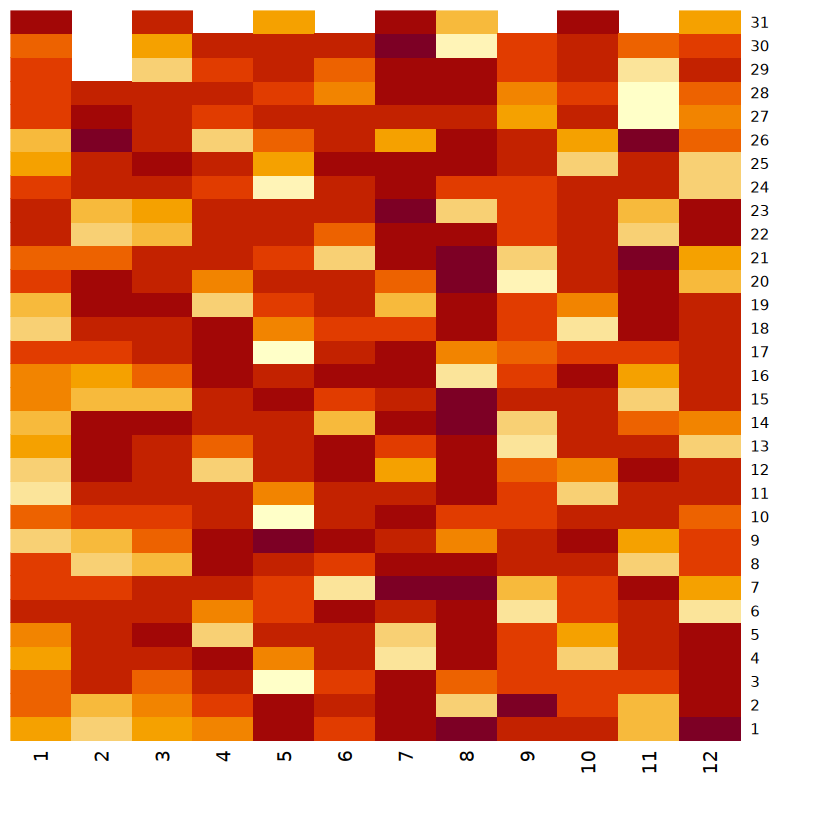

In [29]:
heatmap(flight_times_month, Rowv = NA, Colv=NA)

The heatmap above is for the day of the month category

5.1 - I prefer the heatmap for the days of the week because that heatmap is much smaller and it is easier to read the data than compared to the heatmap for the days of the month one

5.2 - I noticed the air time is higher in the summer months, which would be between June and August, and in the winter months, the airtime is less. The only exception to this is in December because that time is around the holidays

5.3 - I added Rowv = NA and Colv = NA, both of which made the heatmap much easier to look at and be able to read. These commands cleaned up the heatmaps and I was able to better understand their meaning and collect data from them as well